In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)

2. Работа с табличными данными в <a href='http://pandas.pydata.org/pandas-docs/stable/'>Pandas</a>
----------
Pandas может представлять массивы NumPy с метками для строк и столбцов. Начнем с примера.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


Ответим на некоторые вопросы о представленном наборе данных.

**Посмотрим на распределение возраста пассажиров Титаника**

<AxesSubplot:>

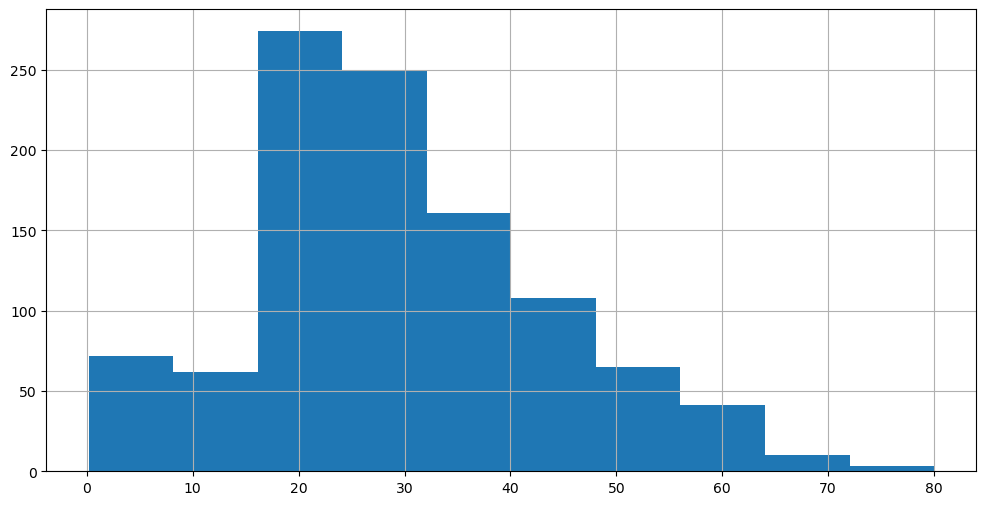

In [5]:
df['age'].hist()

**Скольким мужчинам / женщинам удалось выжить?**

In [6]:
pd.crosstab(df['sex'], df['survived'])

survived,0,1
sex,,
female,127,339
male,682,161


In [7]:
pd.crosstab(df['sex'], df['survived'], normalize=0)

survived,0,1
sex,,
female,0.272532,0.727468
male,0.809015,0.190985


**А каковы доли выживших в различных ценовых классах?**

In [8]:
df.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

<AxesSubplot:xlabel='pclass'>

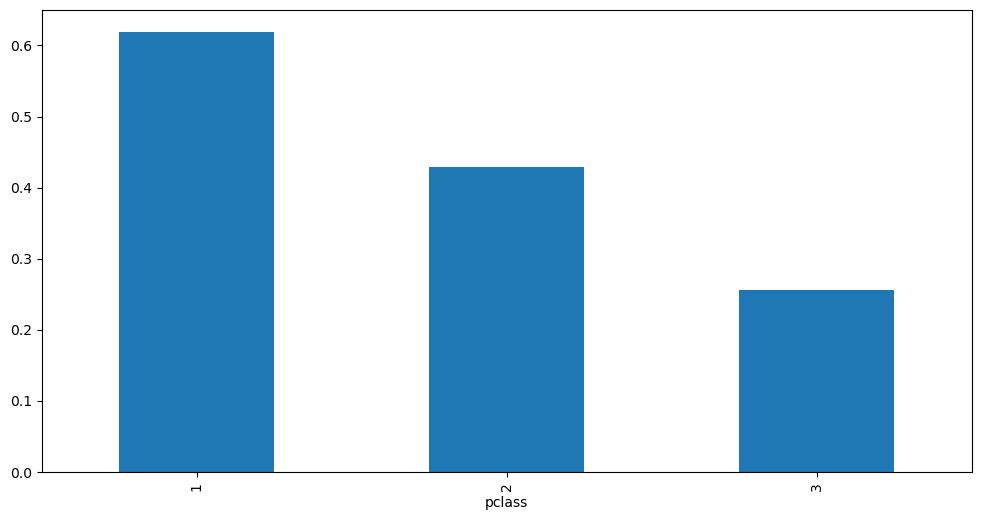

In [9]:
df.groupby('pclass')['survived'].mean().plot(kind='bar')

## 2.1. Структуры данных в Pandas

### 2.1.1. DataFrame

`DataFrame` - представление данных в виде таблицы. Основными атрибутами являются `index` и `columns`.

In [10]:
df.index

RangeIndex(start=0, stop=1309, step=1)

In [11]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [12]:
df.values

array([[1, 1, 'Allen, Miss. Elisabeth Walton', ..., '2', nan,
        'St Louis, MO'],
       [1, 1, 'Allison, Master. Hudson Trevor', ..., '11', nan,
        'Montreal, PQ / Chesterville, ON'],
       [1, 0, 'Allison, Miss. Helen Loraine', ..., nan, nan,
        'Montreal, PQ / Chesterville, ON'],
       ...,
       [3, 0, 'Zakarian, Mr. Mapriededer', ..., nan, 304.0, nan],
       [3, 0, 'Zakarian, Mr. Ortin', ..., nan, nan, nan],
       [3, 0, 'Zimmerman, Mr. Leo', ..., nan, nan, nan]], dtype=object)

Для предварительного анализа пригодятся встроенные функции:

In [13]:
df.shape

(1309, 14)

In [14]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


`DataFrame` можно создать с помощью словаря Python.

In [16]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
df_countries = pd.DataFrame(data)
df_countries

,country,population,area,capital
0,Belgium,11.3,30510,Brussels
1,France,64.3,671308,Paris
2,Germany,81.3,357050,Berlin
3,Netherlands,16.9,41526,Amsterdam
4,United Kingdom,64.9,244820,London


<p><a name="series"></a></p>
### 2.1.2. Series

`Series` служит для представления одномерных данных. Проще говоря, это столбец `DataFrame`.

In [17]:
df['pclass']

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [18]:
df.pclass

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

Основными атрибутами `Series` являются `index` и `values`.

In [19]:
df['pclass'].index

RangeIndex(start=0, stop=1309, step=1)

In [20]:
df['pclass'].values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [21]:
df['pclass'][1]

1

К `Series` можно применять различные операции.

In [22]:
df['age'] * 10

0       290.000
1         9.167
2        20.000
3       300.000
4       250.000
         ...   
1304    145.000
1305        NaN
1306    265.000
1307    270.000
1308    290.000
Name: age, Length: 1309, dtype: float64

In [23]:
df['fare'].mean()

33.29547928134572

In [24]:
df['name'].apply(lambda x: x.split(',')[1])

0                        Miss. Elisabeth Walton
1                         Master. Hudson Trevor
2                           Miss. Helen Loraine
3                   Mr. Hudson Joshua Creighton
4        Mrs. Hudson J C (Bessie Waldo Daniels)
                         ...                   
1304                               Miss. Hileni
1305                              Miss. Thamine
1306                            Mr. Mapriededer
1307                                  Mr. Ortin
1308                                    Mr. Leo
Name: name, Length: 1309, dtype: object

In [25]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [26]:
df['surname'] = df['name'].apply(lambda x: x.split(',')[0])

In [27]:
q = df['fare'].quantile(0.75)
q

31.275

In [28]:
def expensive_ticket(fare):
    return 'Expensive' if (fare > q) else 'Cheap'

In [29]:
df['fare'].apply(expensive_ticket)

0       Expensive
1       Expensive
2       Expensive
3       Expensive
4       Expensive
          ...    
1304        Cheap
1305        Cheap
1306        Cheap
1307        Cheap
1308        Cheap
Name: fare, Length: 1309, dtype: object

**Задание 1**
+ Какой была максимальная цена билета? Медиана?
+ Какова доля выживших?
+ Сколько мужчин / женщин находилось на борту?

In [30]:
df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [32]:
len(df.loc[df['survived'] == 1])/len(df)

0.3819709702062643

In [41]:
df.groupby(['sex'])['pclass'].count()

sex
female    466
male      843
Name: pclass, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
 14  surname    1309 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


**Задание 2**
+ Выведите распределение переменной __pclass__ для мужчин и женщин.
    + Сколько мужчин было в первом классе?
    + Сколько женщин было в третьем классе?
      
+ Создайте новый признак __age_group__, который равен:
    + 1, если пассажир был моложе 30 лет;
    + 2, если пассажиру было от 30 до 60 лет;
    + 3, если пассажир был старше 60 лет.

In [42]:
df['pclass'].unique()

array([1, 2, 3])

In [56]:
df.pivot_table(index=df['pclass'], 
                                 columns='sex',
                                 values='age',
                                 aggfunc='count').reset_index()

sex,pclass,female,male
0,1,133,151
1,2,103,158
2,3,152,349


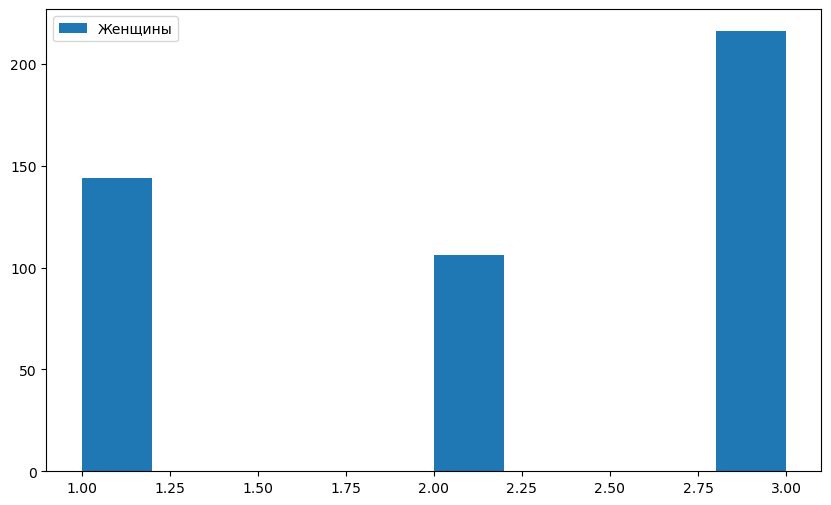

In [46]:
plt.figure(figsize=(10, 6))
pclass_male = df.loc[df['sex'] == 'male']['pclass']
pclass_female = df.loc[df['sex'] == 'female']['pclass']
plt.hist(pclass_female, label='Женщины')
plt.legend(loc='upper left')

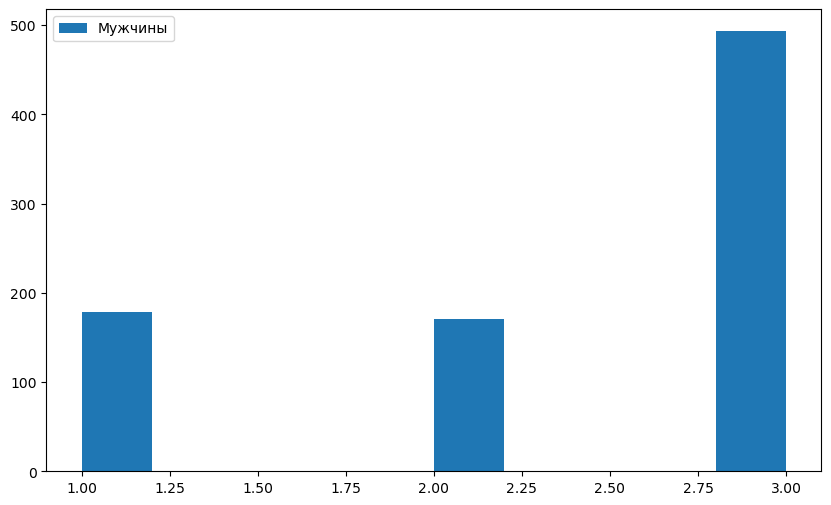

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(pclass_male, label='Мужчины')
plt.legend(loc='upper left')

In [62]:
def age_grouper(age):
    if age < 30:
        return int(1)
    elif  30 <= age <= 60:
        return int(2)
    elif age > 60:
        return int(3)

In [203]:
df['age_group'] = df['age'].apply(age_grouper)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1,Elisabeth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudson
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Helen
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2,Hudson
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1,Hudson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1,Hileni
1305,3,0,"Zabour, Miss. Thamine",female,28.0000,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour,1,Thamine
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1,Mapriededer
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1,Ortin


**Задание 3**\
Найдите самое популярное имя среди пассажиров:
+ мужчин;
+ женщин.

In [74]:
df['name'].unique()

array(['Allen, Miss. Elisabeth Walton', 'Allison, Master. Hudson Trevor',
       'Allison, Miss. Helen Loraine', ..., 'Zakarian, Mr. Mapriededer',
       'Zakarian, Mr. Ortin', 'Zimmerman, Mr. Leo'], dtype=object)

Будем считатать, что имя это первое слово, после Mr или Miss

In [132]:
def firstname(name):
    name = name.split(' ')
    first_name = name[2]
    if '(' in first_name:
        first_name = first_name.replace('(', '')
    if ')' in first_name:
        first_name = first_name.replace(')','')
    if '/' in first_name:
        first_name = first_name.split('/')[0]
    if '.' in first_name:
        first_name = first_name.replace('.','')
    if ',' in first_name:
        first_name = first_name.replace(',','')
    if first_name == 'Master':
        first_name = name[3]
    if first_name == 'Miss':
        first_name = name[3]
    if first_name == 'Mr':
        first_name = name[3]
    if first_name == 'Mrs':
        first_name = name[3]
    return first_name

In [133]:
df['first_name'] = df['name'].apply(firstname)

In [135]:
#Заменим исключения вручную
df['first_name'] = df['first_name'].replace('hoef', 'Wyckoff')
df['first_name'] = df['first_name'].replace('J', 'Frank')
df['first_name'] = df['first_name'].replace('Sir', 'Cosmo')

In [138]:
df.loc[df['first_name'] == 'Sir']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name


In [139]:
df['first_name'].unique()

array(['Elisabeth', 'Hudson', 'Helen', 'Harry', 'Kornelia', 'Thomas',
       'Edward', 'Ramon', 'John', 'Leontine', 'Ellen', 'Algernon',
       'Quigg', 'James', 'Albina', 'Thomson', 'Richard', 'Karl',
       'Rosalie', 'Jakob', 'Dickinson', 'Amelia', 'Mauritz', 'Stephen',
       'Henry', 'Caroline', 'Elizabeth', 'Grace', 'Elsie', 'George',
       'Emil', 'Arthur', 'William', 'Archibald', 'Alexander', 'Frans',
       'Francisco', 'Jose', 'Lucile', 'Howard', 'Tyrell', 'Herbert',
       'Norman', 'Victorine', 'Gladys', 'Paul', 'Edith', 'Roderick',
       'Walter', 'Alice', 'Sara', 'Robert', 'Harriet', 'Peter', 'Sarah',
       'Thornton', 'Albert', 'Washington', 'Frederick', 'Lady', 'Cosmo',
       'Boulton', 'Alfred', 'Margaret', 'Benjamin', 'Ethel', 'Mabel',
       'Charles', 'Mark', 'Laura', 'Isaac', 'Hedwig', 'Maxmillian',
       'Jacques', 'Amalie', 'Dorothy', 'Leonard', 'Victor', 'Samuel',
       'Leo', 'Hammad', 'Christopher', 'Jean', 'Louis', 'Amelie', 'Ann',
       'Joseph', 'Edw

In [149]:
df.groupby(['first_name']).count().sort_values(['pclass'], ascending=False)['pclass']

first_name
William     66
John        56
Charles     28
George      27
Thomas      26
            ..
Hjalmar      1
Hileni       1
Hildur       1
Herman       1
Yousseff     1
Name: pclass, Length: 535, dtype: int64

## 2.2. Извлечение данных

In [150]:
df[['sex', 'age']]

,sex,age
0,female,29.0000
1,male,0.9167
2,female,2.0000
3,male,30.0000
4,female,25.0000
...,...,...
1304,female,14.5000
1305,female,NaN
1306,male,26.5000
1307,male,27.0000


In [151]:
df[5:15]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2.0,Harry
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,3.0,Kornelia
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews,2.0,Thomas
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,2.0,Edward
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3.0,Ramon
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",Astor,2.0,John
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor,1.0,John
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Aubart,1.0,Leontine
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN,Barber,1.0,Ellen
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth,3.0,Algernon


### 2.2.1. Индексация с помощью `loc` и `iloc`

In [152]:
df.iloc[5:15]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2.0,Harry
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,3.0,Kornelia
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",Andrews,2.0,Thomas
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,2.0,Edward
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3.0,Ramon
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY",Astor,2.0,John
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor,1.0,John
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Aubart,1.0,Leontine
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN,Barber,1.0,Ellen
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth,3.0,Algernon


In [153]:
df.iloc[5:15, 4]

5     48.0
6     63.0
7     39.0
8     53.0
9     71.0
10    47.0
11    18.0
12    24.0
13    26.0
14    80.0
Name: age, dtype: float64

In [154]:
df.loc[5:15, 'sex']

5       male
6     female
7       male
8     female
9       male
10      male
11    female
12    female
13    female
14      male
15      male
Name: sex, dtype: object

### 2.2.2. Булева индексация

Соответствует конструкции WHERE clause в SQL.

In [155]:
df['age'] > 30

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

In [156]:
df[df['fare'] > 50] # boolean mask

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1.0,Elisabeth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Hudson
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Helen
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2.0,Hudson
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Hudson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,3,0,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage,NaN,Douglas
1177,3,0,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage,NaN,Frederick
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage,NaN,George
1179,3,0,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,Sage,NaN,John


In [157]:
df[(df['sex'] == 'male') & (df['survived'] == 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Hudson
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2.0,Harry
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",Barkworth,3.0,Algernon
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2.0,Richard
22,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",Behr,1.0,Karl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,3,1,"Tenglin, Mr. Gunnar Isidor",male,25.0000,0,0,350033,7.7958,NaN,S,13 15,NaN,NaN,Tenglin,1.0,Gunnar
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,C,16,NaN,NaN,Thomas,1.0,Assad
1254,3,1,"Tornquist, Mr. William Henry",male,25.0000,0,0,LINE,0.0000,NaN,S,15,NaN,NaN,Tornquist,1.0,William
1256,3,1,"Touma, Master. Georges Youssef",male,7.0000,1,1,2650,15.2458,NaN,C,C,NaN,NaN,Touma,1.0,Georges


**Задание 4**
+ Выведите данные о всех пассажирах, которые сели в Cherbourg (Embarked='C') и были старше 50 лет.
+ Выведите данные о всех женщинах младше 20 и старше 50 лет.
+ Сколько пассажиров старше 70 лет было на борту?

In [158]:
df[(df['embarked'] == 'C') & (df['age'] > 50)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",Artagaveytia,3.0,Ramon
43,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C,8,NaN,"Philadelphia, PA",Bucknell,2.0,William
48,1,1,"Candee, Mrs. Edward (Helen Churchill Hungerford)",female,53.0,0,0,PC 17606,27.4458,NaN,C,6,NaN,"Washington, DC",Candee,2.0,Edward
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA",Cardeza,2.0,James
78,1,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C,14,NaN,"Lakewood, NJ",Compton,3.0,Alexander
104,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C,4,NaN,"Brookline, MA",Eustis,2.0,Elizabeth
123,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,5,NaN,"Zurich, Switzerland",Frolicher-Stehli,2.0,Maxmillian
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY",Goldschmidt,3.0,George
136,1,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C,B,NaN,"Washington, DC",Gracie,2.0,Archibald
174,1,0,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",Kent,2.0,Edward


In [162]:
df[(df['sex'] == 'female') & ((df['age'] > 50) | (df['age'] < 20))]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Helen
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",Andrews,3.0,Kornelia
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",Appleton,2.0,Edward
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY",Astor,1.0,John
27,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C,7,NaN,"Dowagiac, MI",Bishop,1.0,Dickinson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3,0,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN,Van Impe,1.0,Catharina
1273,3,0,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN,Vander Planke,1.0,Augusta
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,NaN,NaN,NaN,Vestrom,1.0,Hulda
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN,Yasbeck,1.0,Antoni


In [168]:
df[df['age'] > 70]['pclass'].count()

6

## 2.3. Добавление и удаление объектов

Для добавления новых объектов можно воспользоваться методом `append` или функцией `pd.concat`.

In [169]:
df1 = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

In [170]:
df1

,A,B
0,1,2
1,3,4


In [171]:
df1.append(df2)

/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_36433/3062608662.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,A,B
0,1,2
1,3,4
0,5,6
1,7,8


In [172]:
df1.append(df2, ignore_index=True)

/var/folders/w8/9v4y5_kd37jbt00wlhrc7tj00000gn/T/ipykernel_36433/2149412069.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, ignore_index=True)


,A,B
0,1,2
1,3,4
2,5,6
3,7,8


In [173]:
pd.concat([df1, df2], ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8


Метод `drop` позволяет удалять строки и столбцы таблицы.

In [174]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1.0,Elisabeth
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Hudson
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Helen
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2.0,Hudson
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Hudson


In [175]:
df.drop(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1.0,Elisabeth
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Helen
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2.0,Hudson
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Hudson
5,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",Anderson,2.0,Harry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1.0,Hileni
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour,NaN,Thamine
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1.0,Mapriededer
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1.0,Ortin


In [176]:
df.drop(['pclass'], axis=1)

,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,1.0,Elisabeth
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Hudson
2,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Helen
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,2.0,Hudson
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,1.0,Hudson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Zabour,1.0,Hileni
1305,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,Zabour,NaN,Thamine
1306,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Zakarian,1.0,Mapriededer
1307,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Zakarian,1.0,Ortin


## 2.4. Заполнение пропусков в данных

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1308 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
 14  surname     1309 non-null   object 
 15  age_group   1046 non-null   float64
 16  first_name  1309 non-null   object 
dtypes: float64(4), int64(4), object(9)
memory usage: 174.0+ KB


In [178]:
df[15:23]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname,age_group,first_name
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",Baumann,NaN,John
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",Baxter,1.0,Quigg
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",Baxter,2.0,James
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN,Bazzani,2.0,Albina
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN",Beattie,2.0,Thomson
20,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2.0,Richard
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith,2.0,Richard
22,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",Behr,1.0,Karl


In [179]:
df['age'].fillna(df['age'].median())[15:23]

15    28.0
16    24.0
17    50.0
18    32.0
19    36.0
20    37.0
21    47.0
22    26.0
Name: age, dtype: float64

In [180]:
df['age'][15:23].fillna(method='ffill')

15     NaN
16    24.0
17    50.0
18    32.0
19    36.0
20    37.0
21    47.0
22    26.0
Name: age, dtype: float64

In [181]:
df['age'][15:23].fillna(method='bfill')

15    24.0
16    24.0
17    50.0
18    32.0
19    36.0
20    37.0
21    47.0
22    26.0
Name: age, dtype: float64

## 2.5. Группировка данных

In [182]:
df['survived'].sum()

500

А если мы хотим посчитать статистики в каждом ценовом классе?

In [53]:
for p in ['C', 'S', 'Q']:
    print(p, df[df['embarked'] == p]['survived'].sum())

C 150
S 304
Q 44


<p>Мы хотим применить одну и ту же функцию `sum()` к столбцу `Survived` на подмножествах данных, сгруппированных по ключу `Pclass`.</p>
<p>Это легко сделать с помощью функции `groupby`. Данная операция состоит из трех шагов и иногда ее называют **"split-apply-combine"**. Аналогична конструкции GROUP BY в SQL.</p>

<ul>
    <li>**Split**: данные делятся на группы по заданному критерию</li>
    <li>**Apply**: к каждой группе применяется необходимая операция</li>
    <li>**Combine**: результат собирается в таблицу</li>
</ul>

In [54]:
df_sample = df.sample(9, random_state=1013)
df_sample

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,surname
537,2,0,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S,NaN,NaN,"Denmark / New York, NY",Ponesell
909,3,1,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S,15,NaN,NaN,Jussila
187,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,9,NaN,"Paris, France",Lines
902,3,0,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,Johnston
1095,3,0,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,NaN,NaN,NaN,O'Sullivan
213,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C,6,NaN,"Lexington, MA",Newell
184,1,0,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,NaN,NaN,"Chicago, IL",Lewy
999,3,1,"McCarthy, Miss. Catherine ""Katie""",female,NaN,0,0,383123,7.7500,NaN,Q,15 16,NaN,NaN,McCarthy
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",Beckwith


In [55]:
df_sample.groupby('embarked')['survived'].sum()

embarked
C    1
Q    1
S    3
Name: survived, dtype: int64

In [56]:
df.groupby('embarked')['survived'].sum()

embarked
C    150
Q     44
S    304
Name: survived, dtype: int64

In [57]:
df.groupby('embarked')['survived'].apply(lambda x: x.sum())

embarked
C    150
Q     44
S    304
Name: survived, dtype: int64

**Задание 5**
+ Посчитайте средний возраст среди мужчин и среди женщин.
+ Посчитайте доли выживших в различных возрастных группах (новый признак **AgeGroup**).
+ Найдите максимальную стоимость билета в каждом из ценовых классов.

In [183]:
df.groupby('sex')['age'].mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [194]:
#так получается с учетом пропусков
df.groupby('age_group')['survived'].apply(lambda x: x.count()/len(df))

age_group
1.0    0.434683
2.0    0.339190
3.0    0.025210
Name: survived, dtype: float64

In [200]:
df['age'] = df['age'].fillna(df['age'].median())

In [201]:
df['age'].isna().sum()

0

In [204]:
df.groupby('age_group')['survived'].apply(lambda x: x.count()/len(df))

age_group
1    0.63560
2    0.33919
3    0.02521
Name: survived, dtype: float64

## 2.6. Сводные таблицы

In [205]:
pd.crosstab(df['embarked'], df['survived'], normalize=0)

survived,0,1
embarked,,
C,0.444444,0.555556
Q,0.642276,0.357724
S,0.667396,0.332604


In [206]:
df.pivot_table(['fare', 'age'], ['pclass'], aggfunc='mean')

,age,fare
pclass,,
1,37.812436,87.508992
2,29.419675,21.179196
3,25.750353,13.302889


**Задание 6**\
Ответьте на предыдущие вопросы с помощью функции crosstab и метода pivot_table.

In [209]:
pd.crosstab(df['pclass'],df['sex'], normalize=0)

sex,female,male
pclass,,
1,0.445820,0.554180
2,0.382671,0.617329
3,0.304654,0.695346


In [210]:
df.pivot_table(index=df['pclass'], 
                                 columns='sex',
                                 values='age',
                                 aggfunc='count').reset_index()

sex,pclass,female,male
0,1,144,179
1,2,106,171
2,3,216,493
